# Data Preparation

## Libraries and Files

In [60]:
import pandas as pd
import numpy as np

In [2]:
column_names=[
    'age', 'class', 'ind_code_det', 'occ_code_det', 'education', 'wage_hr', 'enroll_edu', 'marital',
    'ind_code_maj', 'occ_code_maj', 'race', 'hisp_origin', 'sex', 'lab_union', 'reason_unemp',
    'emp_status', 'cap_gain', 'cap_loss', 'dividend', 'tax_filer_stat', 'prev_res_area', 'prev_res_state',
    'fam_state', 'fam_state_sum', 'inst_weight', 'migr_change_msa', 'migr_change_reg', 'migr_move_msa', 'lived_1yr',
    'migr_sunbelt', 'num_ppl_worked', 'fam_members_u18', 'birth_dad', 'birth_mom', 'birth_self', 'citizenship',
    'employed_status', 'veteran_admin', 'veteran_benefit', 'weeks_worked', 'year', 'income']

data = pd.read_csv('../census-income.data',header=None)
data.columns=column_names
data.head()

,age,class,ind_code_det,occ_code_det,education,wage_hr,enroll_edu,marital,ind_code_maj,occ_code_maj,...,birth_dad,birth_mom,birth_self,citizenship,employed_status,veteran_admin,veteran_benefit,weeks_worked,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


## Data Exploration

### First, plot the distribution of the target variable

In [10]:
data['>50K'] = data['income'].apply(lambda x: 1 if '+' in x else 0)

# Print the distribution of the target variable
target_count = data['>50K'].value_counts()

target_count = pd.DataFrame({'Income': target_count.index,'Count': target_count.values})
# Set index to income
target_count = target_count.set_index('Income')
# Add normalized column
target_count['Percentage'] = 100*target_count['Count']/target_count['Count'].sum()
target_count


,Count,Percentage
Income,,
0,187141,93.794199
1,12382,6.205801


<Axes: title={'center': 'Count (target)'}, xlabel='Income'>

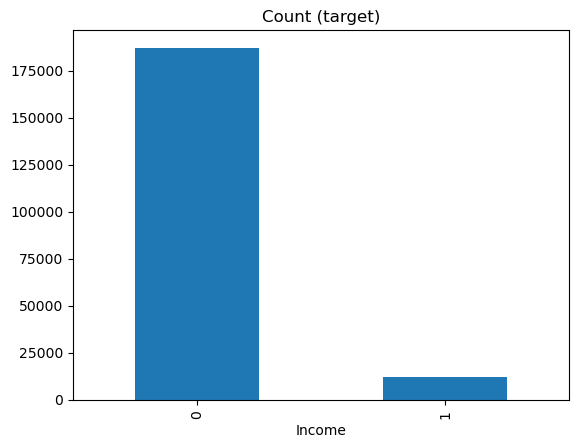

In [13]:
target_count['Count'].plot(kind='bar', title='Count (target)')
# Set the X ticks to be '<=50K' and '>50K'

### Print distribution based on year

In [27]:
year_counts = data['year'].value_counts()

year_counts = pd.DataFrame({'Year': year_counts.index,'Count': year_counts.values})
# Set index to income
year_counts = year_counts.set_index('Year')
# Add normalized column
year_counts['Percentage'] = 100*year_counts['Count']/year_counts['Count'].sum()

print(year_counts)

      Count  Percentage
Year                   
94    99827   50.032828
95    99696   49.967172


### Use the inst_weight column to weight the data

In [35]:
# Use the instance weight column to weight the data to find the number of people in each column

num_people_over = data[(data['>50K']==1) & (data['year']==95)]['inst_weight'].sum()
num_people_under = data[(data['>50K']==0) & (data['year']==95)]['inst_weight'].sum()

total_people = num_people_over + num_people_under

percentage_over = 100*num_people_over/total_people
percentage_under = 100*num_people_under/total_people

# Print the number of people with income over 50K
print(f"There are {round(num_people_over)} people with income over 50K {round(percentage_over,2)}% of the population")
print(f"There are {round(num_people_under)} people with income under 50K {round(percentage_under,2)}% of the population")

comma_number = str(round(total_people))
# Add commas between every 3 digits
comma_number = comma_number[::-1]
comma_number = ','.join([comma_number[i:i+3] for i in range(0, len(comma_number), 3)])
comma_number = comma_number[::-1]

print(f"Total people in 1995: {comma_number}")

There are 11776130 people with income over 50K 6.74% of the population
There are 162899178 people with income under 50K 93.26% of the population
Total people in 1995: 174,675,307


/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_57758/2421785408.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_income = data.groupby(['year','>50K']).sum()['inst_weight']


<Axes: title={'center': 'Income by Year'}>

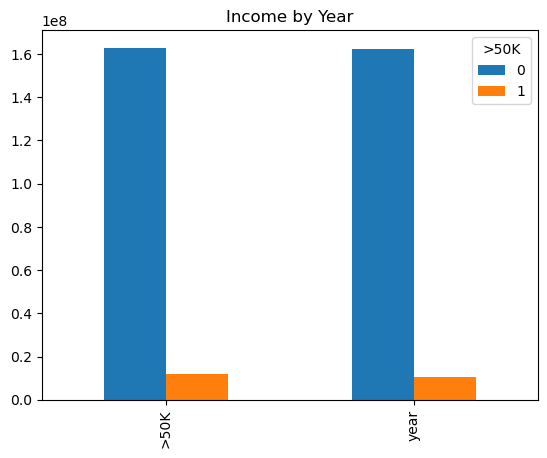

In [53]:
# Plot the people in 1994 vs 1995

# Group the data by year and income
year_income = data.groupby(['year','>50K']).sum()['inst_weight']

# Convert to a dataframe
year_income = pd.DataFrame({'Count': year_income.values}, index=year_income.index)

# Unstack the dataframe
year_income_unstack = year_income.unstack()

# Plot the data
year_income_unstack.pivot_table(index='year',columns='>50K',values='Count').plot(kind='bar',title='Income by Year')

In [54]:
year_income

Count
year >50K              
94   0     1.621055e+08
     1     1.046512e+07
95   0     1.628992e+08
     1     1.177613e+07

In [62]:
# Make a df of the counts of missing values
# Convert '?' to NaN
data = data.replace('?', np.nan)
data = data.replace(' ?', np.nan)

missing_values = pd.DataFrame({'Count': data.isnull().sum()})

missing_values.sort_index(inplace=True)

missing_values

,Count
>50K,0
age,0
birth_dad,6713
birth_mom,6119
birth_self,3393
cap_gain,0
cap_loss,0
citizenship,0
class,0
dividend,0


## Data Cleaning

In [1]:
# Print the first 20 rows of 